#Transfer Learning to Categorize Wonders of the world

#Motivation

Transfer Learning is the new big thing in the field of ML and DL
 
Transfer learning is a technique of implementing the teachings learned in one task on other similar but new (sometimes even more advanced) tasks.
Humans have evolved by doing so, we learn about numbers when we are in primary stage after which we learn to do arithmetic operations and by the time we are in high school we learn to do calculus, and using it with the computers and statistics which we learned at our undergrad, we start building ML and DL models.

Similarly using the already trained models which have already extracted several relationship between various kind of features we can use these pretrained models to do more new exciting things that serve our own unique purpose.

live demo - https://sameerr007-wonderfulwonders-transferlearning.hf.space/

In this project we used a pretrained model and its weights to perform a completely new task of predicting the "wonder of the world" given its image.

#Loading the dataset

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d balabaskar/wonders-of-the-world-image-classification

 99% 428M/432M [00:15<00:00, 27.4MB/s]
100% 432M/432M [00:15<00:00, 29.6MB/s]


In [ ]:
! unzip /content/wonders-of-the-world-image-classification

#Feature Engineering

In [14]:
directory="/content/Wonders of World/Wonders of World/"

In [15]:
import cv2
import os
categories=os.listdir(directory)
categories

['venezuela_angel_falls',
 'burj_khalifa',
 'chichen_itza',
 'machu_pichu',
 'statue_of_liberty',
 'pyramids_of_giza',
 'eiffel_tower',
 'roman_colosseum',
 'taj_mahal',
 'christ_the_reedemer',
 'stonehenge',
 'great_wall_of_china']

In [16]:
data_train=[]
data_valid=[]
for category in categories:
  paths=directory+category
  l=len(os.listdir(paths))
  t=int(l*.8) #80% in training set and 20% in validation set for each category
  v=l-t
  i=1
  for path in os.listdir(paths):
      source=paths+"/"+path
      img=cv2.imread(source)      
      img=cv2.resize(img,(150,150))
      label=categories.index(category)
      if(i<=t):
        data_train.append([img,label])
      else:
        data_valid.append([img,label])
      i=i+1

In [17]:
data_train[0][0].shape

(150, 150, 3)

In [18]:
#shuffling the data to remove any bias due to order
import random
random.shuffle(data_train)
random.shuffle(data_valid)

In [19]:
x_train=[]
y_train=[]
x_valid=[]
y_valid=[]
for a,b in data_train:
  x_train.append(a)
  y_train.append(b)
for a,b in data_valid:
  x_valid.append(a)
  y_valid.append(b)

In [ ]:
y_train

In [21]:
#converting into numpy array so that it can be used in the model
import numpy as np
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_valid=np.asarray(x_valid)
y_valid=np.asarray(y_valid)

In [22]:
#scaling the data for faster processing of data while fitting the model
x_train=x_train/255.0
x_valid=x_valid/255.0

#Model training and evaluation

In [23]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [24]:
#importing the VGG16 model and its weight without including the layers after convolutions because complex features would have been extracted by convolutions
conv_base = VGG16(weights='imagenet',include_top = False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 2s 0us/step


In [25]:
#to show that VGG16 model convolution layers training has been set to false
conv_base.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [26]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
#now adding the layers based on our requirement
model.add(Dense(256,activation='relu'))
model.add(Dense(len(categories),activation='softmax')) 

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="max", patience=7,
                                        restore_best_weights=True)
model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid),callbacks=[earlystopping])

Epoch 1/50
96/96 [==============================] - 20s 96ms/step - loss: 0.7286 - accuracy: 0.7842 - val_loss: 0.3975 - val_accuracy: 0.8695
Epoch 2/50
96/96 [==============================] - 8s 81ms/step - loss: 0.1638 - accuracy: 0.9548 - val_loss: 0.3712 - val_accuracy: 0.8824
Epoch 3/50
96/96 [==============================] - 9s 92ms/step - loss: 0.0599 - accuracy: 0.9870 - val_loss: 0.2167 - val_accuracy: 0.9367
Epoch 4/50
96/96 [==============================] - 8s 81ms/step - loss: 0.0194 - accuracy: 0.9990 - val_loss: 0.1761 - val_accuracy: 0.9483
Epoch 5/50
96/96 [==============================] - 8s 81ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.1811 - val_accuracy: 0.9483
Epoch 6/50
96/96 [==============================] - 8s 82ms/step - loss: 0.0063 - accuracy: 0.9997 - val_loss: 0.1816 - val_accuracy: 0.9548
Epoch 7/50
96/96 [==============================] - 9s 92ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1760 - val_accuracy: 0.9509
Epoch 8/50
9

We can see that our valdiation accuracy has hit a value of 95.74 and around consistently so we can say our model is reliable

In [29]:
#model.save('model.h5')

#User input and prediction

In [32]:
test_img=cv2.imread("taj.jpg")

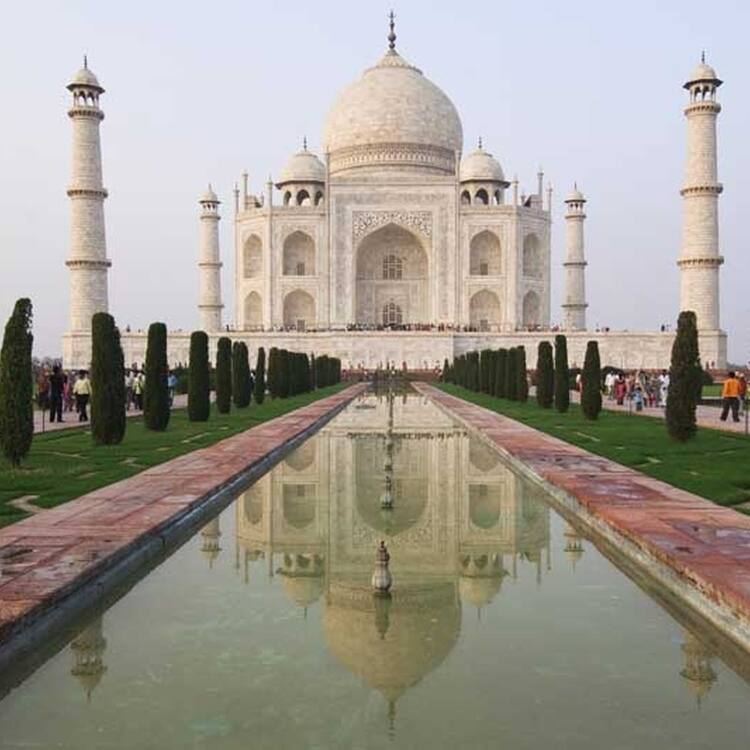

In [33]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)

In [34]:
#preprocess the image to pass it into the model
test_img = cv2.resize(test_img,(150,150))
test_img=test_img/255.0
test_img=np.asarray(test_img)

In [35]:
test_input = test_img.reshape(1,150,150,3)


In [36]:
pred=model.predict(test_input)
print(pred)
print(categories[np.argmax(pred)])

1/1 [==============================] - 1s 659ms/step
[[1.4628996e-11 3.1128824e-08 3.3605941e-06 1.1337131e-10 6.6026002e-09
  3.2667245e-08 1.0109193e-04 1.0901852e-07 9.9989486e-01 4.6020777e-08
  1.7869888e-11 5.2581015e-07]]
taj_mahal


#Model deployment

The code has been deployed in the streamlit server with the help of the hugging face spaces

Repository link for deployment is - https://huggingface.co/spaces/SameerR007/WonderfulWonders_transferLearning/tree/main

Demo link is - https://sameerr007-wonderfulwonders-transferlearning.hf.space/